In [185]:
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
sales = pd.read_csv('all_sales.csv')

### Brief scan of the dataset

In [187]:
sales.info()

# We could see that the RangeIndex (total number of rows) is nmot equal to the Non-Null count.
# That means that the dataset has holes (NaN values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [188]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [189]:
sales[sales.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


### Drop all NaN values, all are irrelevant data

In [190]:
sales.dropna(inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [191]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Adding the necessary columns, such as Month, Total Sales and State

1. Month

In [192]:
# Add the month column (1 to 12)
sales['months'] = sales['Order Date'].str[:2]

# We could see that there's are values that are not 01-12. ('Or' values)
sales[sales.months == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [193]:
# Remove all records with 'Or' values , then convert the values to numeric
sales = sales[sales.months != 'Or']
sales['months'] = pd.to_numeric(sales['months'])

sales.describe()

,months
count,185950.000000
mean,7.059140
std,3.502996
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


2. Total Sales

In [194]:
# add the total sales column. Convert the Qty and Price columns to numeric first to perform calculations
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

sales['total'] = sales['Quantity Ordered'] * sales['Price Each']

In [195]:
# Convert the month column to have the Month names instead
monthnames = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

3. State

In [196]:
# Split the address by comma first, then remove the postal code
sales['state'] = sales['Purchase Address'].apply(lambda x: x.split(', ')[-1].split()[0])

## Questions
1. Which month had the highest sales? Describe the sales trend
2. Which product sold the most?
3. Best performing state (in $ sales), and what is the top selling item for each state?


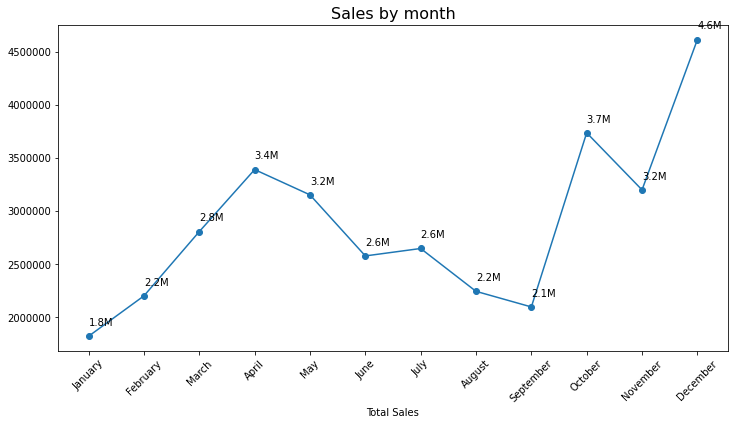

In [197]:
# Month with Highest sales
gb_months = sales.groupby('months').sum()      # Just to remove the scientific notation on the top left
months = gb_months.index
total_sales = gb_months['total']

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(months, total_sales, marker='o')
ax.set_title('Sales by month', size=16)
ax.set_xlabel('Total Sales')
ax.set_xticks(months, monthnames, rotation=45)
ax.ticklabel_format(style='plain', axis='y')

# Set labels on the plots
for i, txt in enumerate(total_sales.to_list()):
    txt = f'{round(txt/1000000,1)}M'
    ax.annotate(txt, (i+1, total_sales.to_list()[i]+100000))
 
plt.show()

- We could see from the chart above that the month of December had the highest sales for the whole year.
- Sales declined during the 2nd and 3rd quarter, but had a significant rise on the holiday season.

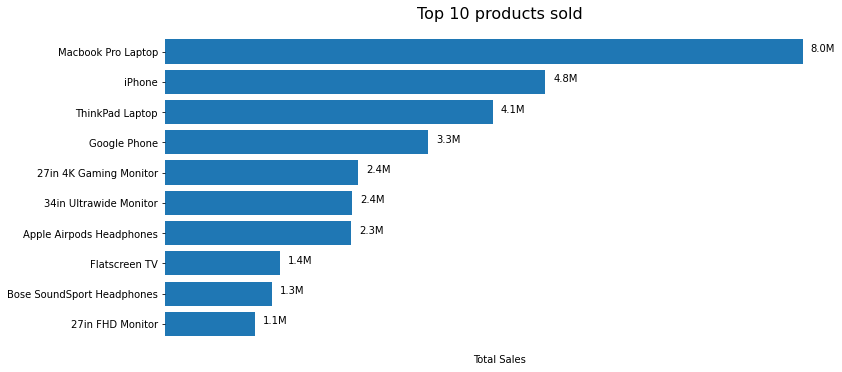

In [198]:
# Products with the highest sales
gb_products = sales.groupby('Product').sum().nlargest(10, 'total').sort_values(by='total')
products = gb_products.index
product_sales = gb_products['total']

fig, ax = plt.subplots(figsize=(12,6))

ax.barh(products, product_sales)
ax.plot()
ax.set_title('Top 10 products sold', size=16)
ax.set_xlabel('Total Sales')
ax.set_xticks([])
ax.ticklabel_format(style='plain', axis='x')

for s in plt.gca().spines.values():
    s.set_visible(False)

# Set labels on the plots
for i, ps in enumerate(product_sales.to_list()):
    ps = f'{round(ps/1000000,1)}M'
    ax.annotate(ps, (product_sales.to_list()[i]+100000, products.to_list()[i]))

plt.show()

- Macbook Pro Laptop was the top seller for the year

In [243]:
# Sales by state
state_sales = sales.groupby(['state']).sum()[['total']]

# Get sales of each product by state
best_seller = sales.groupby(['state', 'Product']).sum()[['total']].sort_values('total', ascending=False)
best_seller = best_seller[best_seller['total'] == best_seller.groupby(level=0)['total'].transform(max)]

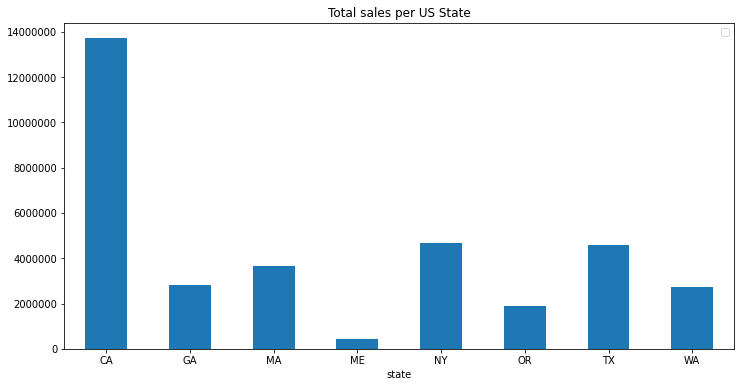

In [200]:
ax = state_sales.plot(kind='bar', figsize=(12,6), rot=0)

ax.set_title('Total sales per US State')
ax.legend('')
ax.ticklabel_format(style='plain', axis='y')

- Of all the sales across the US, California evidently has the largest chunk of sales for the year.
- Due to the high cost associated with Apple products, Macbook Pro Laptops were the top sellers in every state 

In [245]:
print('Here are the top item sold per state for the year')
best_seller

Here are the top item sold per state for the year


,,total
state,Product,
CA,Macbook Pro Laptop,3207900.0
NY,Macbook Pro Laptop,1116900.0
TX,Macbook Pro Laptop,1076100.0
MA,Macbook Pro Laptop,814300.0
GA,Macbook Pro Laptop,644300.0
WA,Macbook Pro Laptop,605200.0
OR,Macbook Pro Laptop,465800.0
ME,Macbook Pro Laptop,107100.0
